In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [84]:
modi_reviews = pd.read_csv('modi.csv')
rahul_reviews = pd.read_csv('rahul.csv')

In [85]:
def get_sentiment(Tweet):
    blob = TextBlob(Tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [86]:
from textblob import TextBlob

In [87]:
modi_reviews['sentiment'] = modi_reviews['Tweet'].apply(get_sentiment)

In [88]:
rahul_reviews['sentiment'] = rahul_reviews['Tweet'].apply(get_sentiment)

In [89]:
print(modi_reviews['sentiment'].value_counts())
print(rahul_reviews['sentiment'].value_counts())

neutral     37798
positive    27855
negative     4347
Name: sentiment, dtype: int64
neutral     41100
positive    21341
negative     7559
Name: sentiment, dtype: int64


In [90]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(modi_reviews['Tweet'])


In [91]:
y = modi_reviews['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
X1 = vectorizer.fit_transform(rahul_reviews['Tweet'])
y1 = rahul_reviews['sentiment']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


In [93]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [94]:
y_pred_nb = nb.predict(X_test)

In [95]:
nb = MultinomialNB()
nb.fit(X1_train, y1_train)

MultinomialNB()

In [96]:
y1_pred_nb = nb.predict(X1_test)

In [97]:
print('Narendra Modi')
print('Naive Bayes Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))


Narendra Modi
Naive Bayes Classifier:
Accuracy: 0.768095238095238
Confusion Matrix:
[[ 326  128  839]
 [ 195 7874 3313]
 [  63  332 7930]]


In [98]:
print('Rahul Gandhi')
print('Naive Bayes Classifier:')
print('Accuracy:', accuracy_score(y1_test, y1_pred_nb))
print('Confusion Matrix:')
print(confusion_matrix(y1_test, y1_pred_nb))


Rahul Gandhi
Naive Bayes Classifier:
Accuracy: 0.7272380952380952
Confusion Matrix:
[[ 529  308 1468]
 [ 181 9079 3048]
 [  39  684 5664]]


In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
y_pred = model.predict(X_test)

In [102]:
print('Narendra Modi')
print('Decision Tree Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Narendra Modi
Decision Tree Classifier:
Accuracy: 0.9031904761904762
Confusion Matrix:
[[  722   307   264]
 [  143 10796   443]
 [  197   679  7449]]


In [103]:
model = DecisionTreeClassifier()
model.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [104]:
y1_pred = model.predict(X1_test)

In [105]:
print('Rahul Gandhi')
print('Decision Tree Classifier:')
print('Accuracy:', accuracy_score(y1_test, y1_pred))
print('Confusion Matrix:')
print(confusion_matrix(y1_test, y1_pred))


Rahul Gandhi
Decision Tree Classifier:
Accuracy: 0.871
Confusion Matrix:
[[ 1306   472   527]
 [  212 11678   418]
 [  372   708  5307]]


In [106]:
print(modi_reviews.head())
print(rahul_reviews.head())

         Date             User  \
0  2022:10:19   QuestionsBotYT   
1  2022:10:19       PaperDabba   
2  2022:10:19   mnjworldcom123   
3  2022:10:19  BravePedestrian   
4  2022:10:19   NaMoPraveenKor   

                                               Tweet      Time sentiment  
0                        Is Narendra Modi a toaster?  23:57:08   neutral  
1  5G About To Bring Major Change, Will Revolutio...  23:56:38  positive  
2  Prime Minister Shri Narendra Modi along with H...  23:51:02  positive  
3  Bharat Mata has waited 5000 years for a true s...  23:40:58  positive  
4  How Narendra Modi’s game-changing Gati Shakti ...  23:34:25   neutral  
         Date             User  \
0  2022:10:19          MdIjran   
1  2022:10:19  28bde43dae3c430   
2  2022:10:19         SkAnzar5   
3  2022:10:19    HariRamDamor2   
4  2022:10:19     srinivas_das   

                                               Tweet      Time sentiment  
0  @JaikyYadav16 इन विकल्पों में से और अभी के समय...  23:55:49   

In [107]:
textblob1 = TextBlob(modi_reviews["Tweet"][10])
print("Modi :",textblob1.sentiment)
textblob2 = TextBlob(rahul_reviews["Tweet"][500])
print("Rahul :",textblob2.sentiment)

Modi : Sentiment(polarity=0.5, subjectivity=1.0)
Rahul : Sentiment(polarity=0.0, subjectivity=0.0)


In [108]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity
modi_reviews["Sentiment Polarity"] = modi_reviews["Tweet"].apply(find_pol)
print(modi_reviews.tail())
rahul_reviews["Sentiment Polarity"] = rahul_reviews["Tweet"].apply(find_pol)
print(rahul_reviews.tail())

             Date             User  \
69995  2022:09:15   sachindedha123   
69996  2022:09:15  eventneedzkdspl   
69997  2022:09:15        sansad_tv   
69998  2022:09:15     NewsNamibian   
69999  2022:09:15     NewsNamibian   

                                                   Tweet      Time sentiment  \
69995  माननीय प्रधानमंत्री आदरणीय श्री Narendra Modi ...  09:05:11   neutral   
69996  A specially customised Indian aircraft has rea...  09:04:31  positive   
69997  Watch: Prime Minister Narendra Modi's remarks ...  09:02:11   neutral   
69998  8 Namibian cheetahs coming to India on PM Nare...  09:00:08   neutral   
69999  Special plane lands in Namibia to get African ...  09:00:04  positive   

       Sentiment Polarity  
69995            0.000000  
69996            0.178571  
69997            0.000000  
69998            0.000000  
69999            0.178571  
             Date             User  \
69995  2022:09:24  Dilipmakwana181   
69996  2022:09:24     RoshanKrRaii   
69997  2

In [109]:
modi_reviews["Expression Label"] = np.where(modi_reviews["Sentiment Polarity"]>0, "positive", "negative")
modi_reviews["Expression Label"][modi_reviews["Sentiment Polarity"]==0]="Neutral"
print(modi_reviews.tail())

rahul_reviews["Expression Label"] = np.where(rahul_reviews["Sentiment Polarity"]>0, "positive", "negative")
rahul_reviews["Expression Label"][rahul_reviews["Sentiment Polarity"]==0]="Neutral"
print(rahul_reviews.tail())

             Date             User  \
69995  2022:09:15   sachindedha123   
69996  2022:09:15  eventneedzkdspl   
69997  2022:09:15        sansad_tv   
69998  2022:09:15     NewsNamibian   
69999  2022:09:15     NewsNamibian   

                                                   Tweet      Time sentiment  \
69995  माननीय प्रधानमंत्री आदरणीय श्री Narendra Modi ...  09:05:11   neutral   
69996  A specially customised Indian aircraft has rea...  09:04:31  positive   
69997  Watch: Prime Minister Narendra Modi's remarks ...  09:02:11   neutral   
69998  8 Namibian cheetahs coming to India on PM Nare...  09:00:08   neutral   
69999  Special plane lands in Namibia to get African ...  09:00:04  positive   

       Sentiment Polarity Expression Label  
69995            0.000000          Neutral  
69996            0.178571         positive  
69997            0.000000          Neutral  
69998            0.000000          Neutral  
69999            0.178571         positive  
             Date   

C:\Users\ksk_k\AppData\Local\Temp\ipykernel_20088\50932520.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ksk_k\AppData\Local\Temp\ipykernel_20088\50932520.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
reviews1 = modi_reviews[modi_reviews['Sentiment Polarity'] == 0.0000]
print(reviews1.shape)

cond1=modi_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
modi_reviews.drop(modi_reviews[cond1].index, inplace = True)
print(modi_reviews.shape)

reviews2 = rahul_reviews[rahul_reviews['Sentiment Polarity'] == 0.0000]
print(reviews2.shape)

cond2=rahul_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
rahul_reviews.drop(rahul_reviews[cond2].index, inplace = True)
print(rahul_reviews.shape)

(37798, 7)
(32202, 7)
(41100, 7)
(28900, 7)


In [111]:
# Narendra Modi
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(modi_reviews.index, remove_n, replace=False)
df_subset_modi = modi_reviews.drop(drop_indices)
print(df_subset_modi.shape)
# Rahul Gandhi
np.random.seed(15)
remove_n =500
drop_indices = np.random.choice(rahul_reviews.index, remove_n, replace=False)
df_subset_rahul = rahul_reviews.drop(drop_indices)
print(df_subset_rahul.shape)

(31878, 7)
(28400, 7)


In [112]:
from wordcloud import WordCloud,STOPWORDS
import plotly.graph_objects as go
import plotly.express as px

In [113]:
import seaborn as sns

                   Date   User  Tweet   Time  sentiment  Sentiment Polarity
Expression Label                                                           
negative           4305   4305   4305   4305       4305                4305
positive          27573  27573  27573  27573      27573               27573
                   Date   User  Tweet   Time  sentiment  Sentiment Polarity
Expression Label                                                           
negative           7422   7422   7422   7422       7422                7422
positive          20978  20978  20978  20978      20978               20978


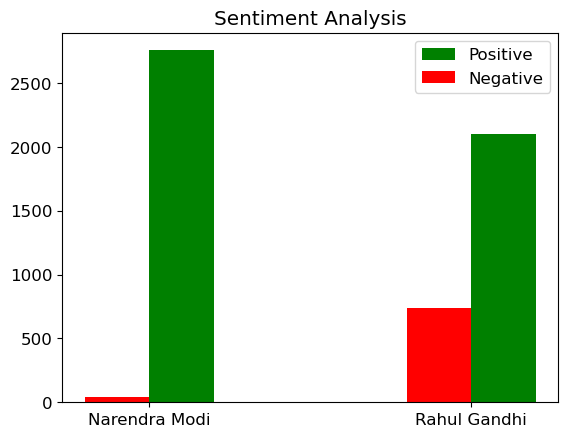

In [134]:
count_1 = df_subset_modi.groupby('Expression Label').count()
print(count_1)

negative_per1 = (count_1['Sentiment Polarity'][0]/1000)*10
positive_per1 = (count_1['Sentiment Polarity'][1]/1000)*100

count_2 = df_subset_rahul.groupby('Expression Label').count()
print(count_2)

negative_per2 = (count_2['Sentiment Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment Polarity'][1]/1000)*100

Politicians = ['Narendra Modi', 'Rahul Gandhi'] # Replace this with your own data
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

x_pos = [i + 0.1 for i, _ in enumerate(Politicians)]
x_neg = [i - 0.1 for i, _ in enumerate(Politicians)]

fig, ax = plt.subplots()

ax.bar(x_pos, lis_pos, width=0.2, color='green', label='Positive')
ax.bar(x_neg, lis_neg, width=0.2, color='red', label='Negative')


ax.set_title('Sentiment Analysis')
ax.set_xticks(range(len(Politicians)))
ax.set_xticklabels(Politicians)
ax.legend()

plt.show()





In [132]:
count_1 = df_subset_modi.groupby('Expression Label').count()
print(count_1)

negative_per1 = (count_1['Sentiment Polarity'][0]/1000)*10
positive_per1 = (count_1['Sentiment Polarity'][1]/1000)*100

count_2 = df_subset_rahul.groupby('Expression Label').count()
print(count_2)
negative_per2 = (count_2['Sentiment Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment Polarity'][1]/1000)*100

Politicians = ['Narendra Modi', 'Rahul Gandhi']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

                   Date   User  Tweet   Time  sentiment  Sentiment Polarity
Expression Label                                                           
negative           4305   4305   4305   4305       4305                4305
positive          27573  27573  27573  27573      27573               27573
                   Date   User  Tweet   Time  sentiment  Sentiment Polarity
Expression Label                                                           
negative           7422   7422   7422   7422       7422                7422
positive          20978  20978  20978  20978      20978               20978


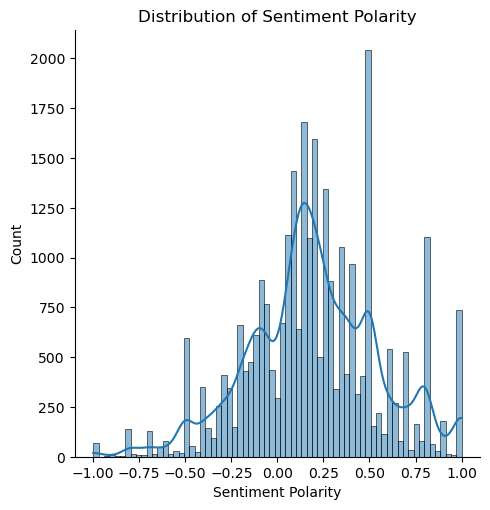

In [76]:
sns.distplot(df_subset_rahul['Sentiment Polarity'])


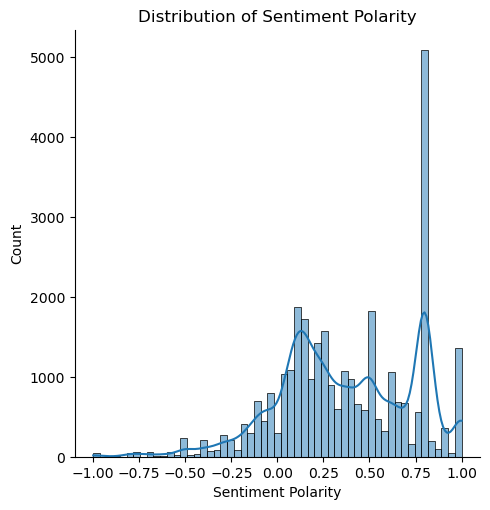

In [73]:
sns.displot(df_subset_modi['Sentiment Polarity'], kde=True)

# Set the plot title and axis labels
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')

# Show the plot
plt.show()


In [119]:
import matplotlib.pyplot as plt

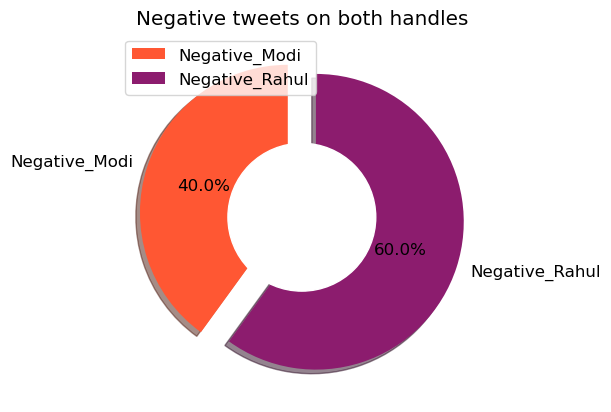

In [129]:
labels = ['Negative_Modi', 'Negative_Rahul']
sizes = [40, 60] # Replace this with your own data
explode = (0.1, 0.1)
colors = ['#FF5733', '#8C1C6E'] # Custom colors for the chart

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)

# Add title and legend
ax1.set_title('Negative tweets on both handles')
ax1.legend(labels, loc='upper left')

# Change default font size
plt.rcParams.update({'font.size': 12})

# Add circle at the center to make it a donut chart
circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.show()

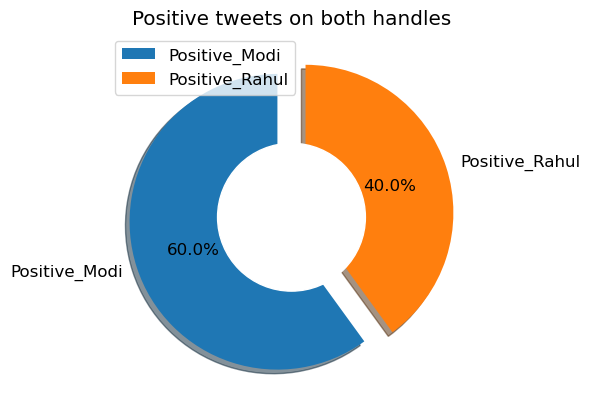

In [126]:
import matplotlib.pyplot as plt

labels = ['Positive_Modi', 'Positive_Rahul'] # Replace this with your own data
sizes = [60, 40] # Replace this with your own data
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Add title and legend
ax1.set_title('Positive tweets on both handles')
ax1.legend(labels, loc='upper left')

# Add circle at the center to make it a donut chart
circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.show()


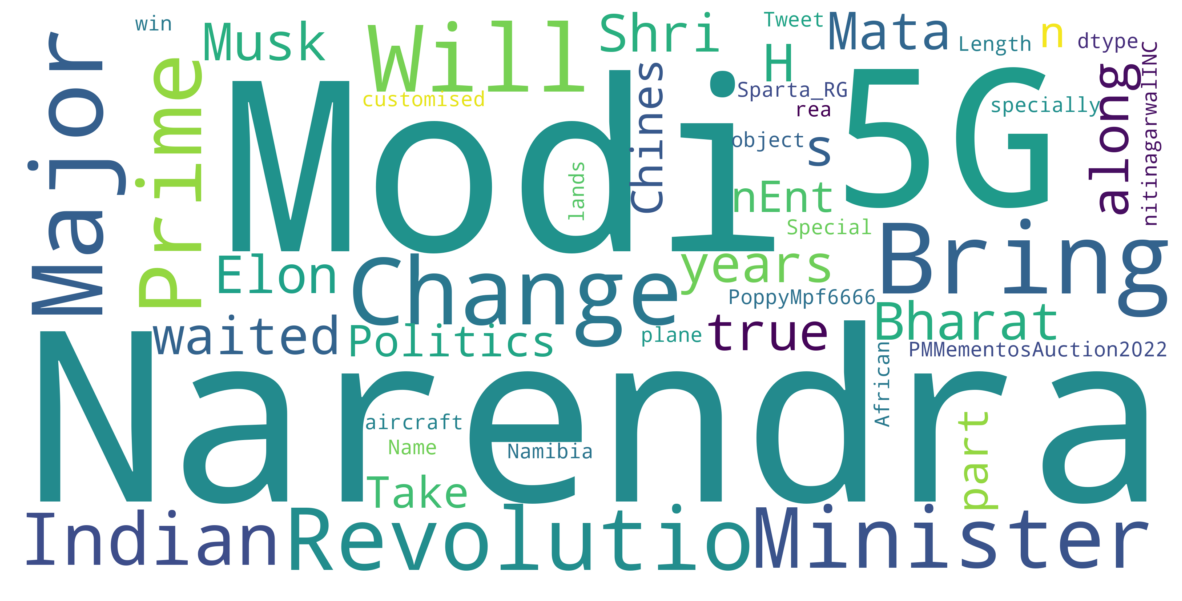

In [69]:
Tweet = str(df_subset_modi.Tweet)

wordcloud = WordCloud(max_font_size=100, max_words=500, scale=8, relative_scaling=.6, background_color="white").generate(Tweet)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

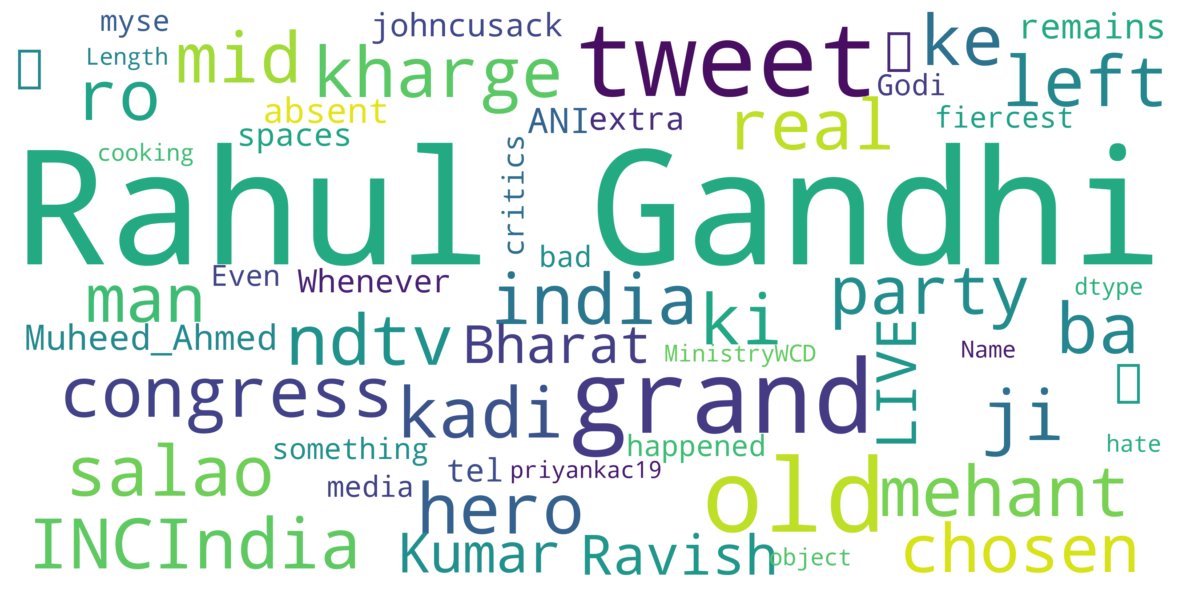

In [72]:
Tweet = str(df_subset_rahul.Tweet)

wordcloud = WordCloud(max_font_size=100, max_words=500, scale=8, relative_scaling=.6, background_color="white").generate(Tweet)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
